In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def bollinger_bands(data, window_size=30):
  rolling_mean = data['Close'].rolling(window=window_size).mean() #Calculate the rolling mean of the Close price
  rolling_std = data['Close'].rolling(window=window_size).std() #Calculate the rolling standard deviation of the Close price
  data['Upper_Band'] = rolling_mean + (rolling_std * 2)
  data['Lower_Band'] = rolling_mean - (rolling_std * 2)
  return data

In [3]:
#Define a function to create and get the relative strength index(RSI)
def RSI(data, window_size=14):
  delta= data['Close'].diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  avg_gain = gain.rolling(window=window_size).mean()
  avg_loss = loss.rolling(window=window_size).mean()
  RS = avg_gain / avg_loss
  RSI = 100 - (100 / (1 + RS))
  data['RSI'] = RSI
  data['Overbought'] = 70
  data['Oversold'] = 30
  return data

In [4]:
#Define a function to create and get the trading strategy
#Buy when the close price goes below the Lower Band and the RSI is less than 30 and I currently don't have a position
#Sell when the close price goes above the Upper Band and the RSI is greater than 70 and I currently have a position
def strategy(data):
  position = 0
  buy_price = []
  sell_price = []
  for i in range(len(data)):
    if data['Close'][i] < data['Lower_Band'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
      position = 1
      buy_price.append(data['Close'][i])
      sell_price.append(np.nan)
    elif data['Close'][i] > data['Upper_Band'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
      position = 0
      buy_price.append(np.nan)
      sell_price.append(data['Close'][i])
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
  return buy_price, sell_price



In [5]:
data = pd.read_csv('TSLA.csv')
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [6]:
#Add the bollinger bands to the dataset
data = bollinger_bands(data)

In [7]:
data = RSI(data)

In [8]:
#Implement trading strategy
buy_price, sell_price = strategy(data)
data['Buy'] = buy_price
data['Sell'] = sell_price

<ipython-input-4-e911044032bd>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][i] < data['Lower_Band'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
<ipython-input-4-e911044032bd>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Close'][i] > data['Upper_Band'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
<ipython-input-4-e911044032bd>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

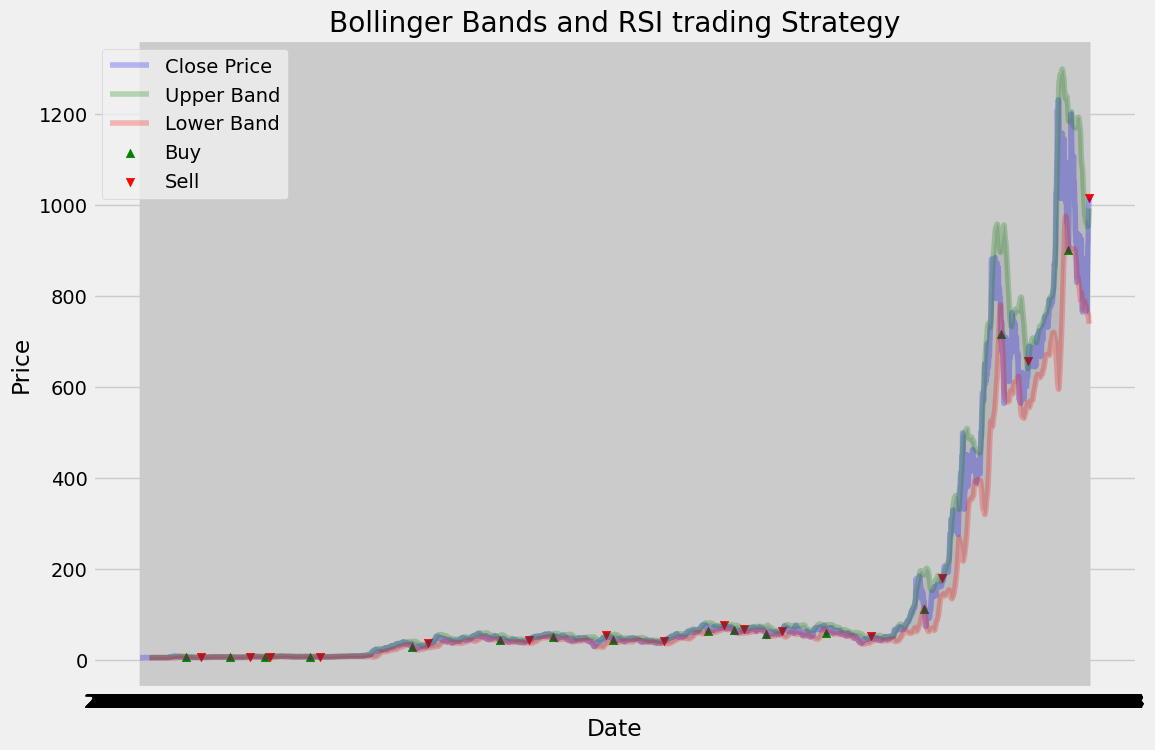

In [9]:
#Plot the bollinger bands , close price and the trading signals (Buy and Sell signals)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Bollinger Bands and RSI trading Strategy')
plt.ylabel('Price in USD')
plt.xlabel('Date')
ax.plot(data['Close'], label='Close Price', alpha = 0.25, color = 'blue')
ax.plot(data['Upper_Band'], label='Upper Band', color = 'green', alpha =0.25)
ax.plot(data['Lower_Band'], label='Lower Band', color = 'red', alpha =0.25)
ax.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='grey', alpha=0.25)
ax.scatter(data.index, data['Buy'], label='Buy', marker='^', color='green', alpha=1)
ax.scatter(data.index, data['Sell'], label='Sell', marker='v', color='red', alpha=1)
plt.legend()
plt.show()